# 💱 CredCastle 🏰

<a href="https://colab.research.google.com/github/DAOresearch/cadcad/blob/main/cadcad_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [34]:
# If using Google Colab
#%%capture
#!pip install cadcad

In [35]:
import random # psuedo randomness generator
import numpy as np # import numerical python
import pandas as pd # pandas data viz
import matplotlib.pyplot as plt # math plotting library

from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor

## Initial Conditions & Parameters


In [78]:
# State Variables
initial_conditions = {
    'village_folk': 100, # num village folk
    'castle': 0, # the castle
    'castle_tokens': 0 # the castle tokens
}

# Function Parameters
params = { 
    'baseline_villager_effort': 1,# villager effort
}

# Simulation Parameters
simulation_parameters = {
    'T': range(365), # Number of timesteps (365 days)
    'N': 1, # Number of runs through all the timesteps (1 year)
    'M': {} # Advanced system params
}

## Policies

In [37]:
# Determine villlager effort for the day
def p_villager_effort(params, step, sL, s, _input):
    y = 'baseline_villager_effort'
    x = s[y]
    x = x * np.random.randint(100) # multiiple villager_effort by a random integer between 1 and 100
    return ('current_villager_effort': x)

## State Update Functions

In [38]:
# How villagers build the castle
def s_build_castle(params, step, sL, s, _input):
    y = 'castle'
    x = s[y]
    x += _input['current_villager_effort'] * np.random.randint(100) # multiiple villager_effort by a random integer between 1 and 100
    return (y, x)

# Gives villagers tokens based on how much they build
def s_award_tokens(params, step, sL, s, _input):
    y = 'castle_tokens'
    x = s[y]
    new_castle = 'castle'
    x = new_castle
    return (y, x)

## State Update Blocks

In [39]:
# A day in CredLand
partial_state_update_blocks = [
    { 
        'policies': {
            'villager_effort': p_villager_effort
        },
        'variables': {
            'castle': s_build_castle
        }
    },
    {
        'variables': {
            'castle_tokens': s_award_tokens
        }
    }
]

## Configuration & Execution

In [40]:
sim_config = config_sim(simulation_parameters)

exp = Experiment()
exp.append_configs(sim_configs=sim_config, 
                   initial_state=initial_conditions,
                   partial_state_update_blocks=partial_state_update_blocks)


from cadCAD import configs
exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.local_mode)
executor = Executor(exec_context=exec_context, configs=configs) 
(records, tensor_field, _) = executor.execute()

ValueError: max() arg is an empty sequence

## Data Viz

In [ ]:
# What does this do?
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [19]:
#import pandas as pd
raw_system_events, tensor_field, sessions = simulation.execute()

# Simulation Result Types:
# raw_system_events: List[dict] 
# tensor_field: pd.DataFrame

# Result System Events DataFrame
simulation_result = pd.DataFrame(raw_system_events)

Configurations Length: 1
Execution Method: local_simulations
Execution Mode: single_threaded


In [20]:
simulation_result.head()

,castle,castle_token_supply,run,simulation,substep,timestep,village_folk
0,0,0.0,1,0,0,0,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
1,2,2.0,1,0,0,1,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
2,3,3.0,1,0,0,2,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
3,4,4.0,1,0,0,3,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
4,8,7.0,1,0,0,4,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."


In [21]:
def get_stuff(villager, data):
    record = data[villager]
    return record['stuff']

def get_tokens(villager, data):
    record = data[villager]
    return record['tokens']

In [22]:
df = simulation_result

In [23]:
keys = df.village_folk[0].keys()

In [24]:
stuff_cols = ['stuff'+str(k) for k in keys]
token_cols = ['tokens'+str(k) for k in keys]

In [25]:
for k in keys:
    df['stuff'+str(k)]= df.village_folk.apply(lambda x: get_stuff(k,x))
    df['tokens'+str(k)]= df.village_folk.apply(lambda x: get_tokens(k,x))
    

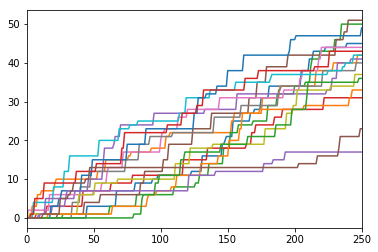

In [26]:
df[token_cols].plot(legend = False)

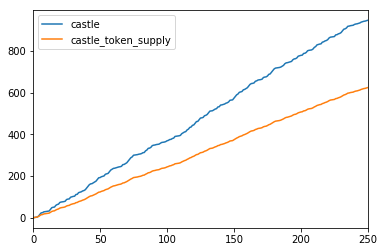

In [27]:
df[['castle','castle_token_supply']].plot()

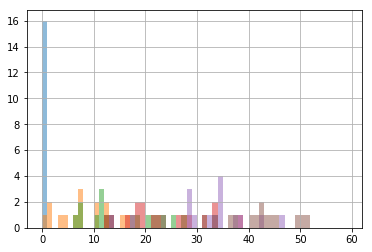

In [28]:
T = len(df[token_cols])

for t in range(T):
    if np.mod(t,50)==0:
        df[token_cols].iloc[t].hist(alpha=.5, bins=range(60))